In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance

In [2]:
image21 = np.array(Image.open('./data/image1.png'))
image22 = np.array(Image.open('./data/image2.png'))
##print(np.size(image21))
##print(np.size(image22))
image11 = np.ravel(image21)
image12 = np.ravel(image22)
image11 = image11 - np.average(image11)
image12 = image12 -np.average(image22)
##print(np.size(image11))
##print(np.size(image12))

In [3]:
z = np.array([image11, image12])
sigma = np.linalg.eig(np.cov(z))
D = sigma[0]
D = 1/np.sqrt(D)
E = sigma[1]
tmp = np.dot(E, np.diag(D))
V = np.dot(tmp, E.T)
z = np.dot(V,z)
size = np.size(image11)
print(size)

262144


In [4]:
rerult21 = np.empty(image21.shape)
result22 = np.empty(image22.shape)

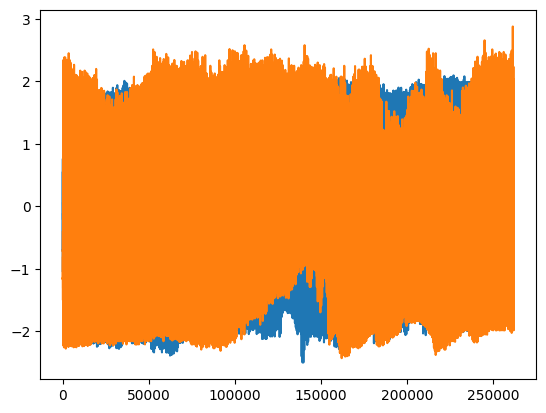

In [5]:
w = np.array([1,1])
wT = w.T
wT = wT/np.linalg.norm(wT)
former = w
while(1):
  wT = w.T
  tmp = np.power(np.dot(wT, z), 3)
  tmp = np.dot(z, tmp)
  tmp = tmp/size - 3*w
  tmp /= np.linalg.norm(tmp)
  w = tmp
  if(np.isclose(w,former).all() or np.isclose(w,former*(-1)).all()):
    break
  else:
    former = w
plt.plot(np.dot(w,z))
result21 = np.dot(w,z)

w = np.array([-0.9,0.9])
wT = w.T
wT = wT/np.linalg.norm(wT)
former = w
while(1):
  wT = w.T
  tmp = np.power(np.dot(wT, z), 3)
  tmp = np.dot(z, tmp)
  tmp = tmp/size - 3*w
  tmp /= np.linalg.norm(tmp)
  w = tmp
  if(np.isclose(w,former).all() or np.isclose(w,former*(-1)).all()):
    break
  else:
    former = w
plt.plot(np.dot(w,z))
result22 = np.dot(w,z)

In [6]:
def Luminance(x):
    min = np.amin(x)
    max = np.amax(x)
    return (x - min)* 255 / (min - max)

In [7]:
a = Luminance(result21)
b = Luminance(result22)
a = a.reshape(512,512).astype(np.uint8)
b = b.reshape(512,512).astype(np.uint8)
Image.fromarray(a).save("./result/pic1.png")
Image.fromarray(b).save("./result/pic2.png")